In [ ]:
#pip install tensorflow

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-01-08 20:19:07.289190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pathlib
data_dir = pathlib.Path('train')
test_dir = pathlib.Path('test')

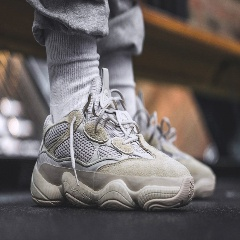

In [3]:
#visualize some data
import PIL
adidas = list(data_dir.glob('adidas/*'))
PIL.Image.open(str(adidas[0]))

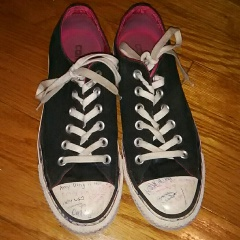

In [4]:
#visualize some data
import PIL
converse = list(data_dir.glob('converse/*'))
PIL.Image.open(str(converse[0]))

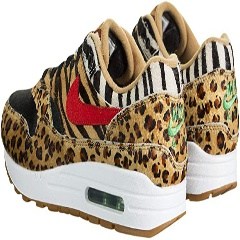

In [5]:
import PIL
nike = list(data_dir.glob('nike/*'))
PIL.Image.open(str(nike[3]))

In [6]:
#load datasets using tf.keras.utils.image_dataset_from_directory

In [7]:
#set parameters
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 711 files belonging to 3 classes.
Using 569 files for training.


2023-01-08 20:19:12.186624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 711 files belonging to 3 classes.
Using 142 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['adidas', 'converse', 'nike']


In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
#using cache and prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [13]:
# create a basic Keras model

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
#train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
18/18 [==============================] - 7s 352ms/step - loss: 1.3470 - accuracy: 0.3216 - val_loss: 1.0974 - val_accuracy: 0.2958
Epoch 2/10
18/18 [==============================] - 6s 322ms/step - loss: 1.0832 - accuracy: 0.4236 - val_loss: 1.0874 - val_accuracy: 0.4155
Epoch 3/10
18/18 [==============================] - 6s 318ms/step - loss: 1.0218 - accuracy: 0.5185 - val_loss: 1.0700 - val_accuracy: 0.4718
Epoch 4/10
18/18 [==============================] - 6s 320ms/step - loss: 0.9320 - accuracy: 0.5483 - val_loss: 1.1474 - val_accuracy: 0.4577
Epoch 5/10
18/18 [==============================] - 6s 317ms/step - loss: 0.8218 - accuracy: 0.6081 - val_loss: 1.1048 - val_accuracy: 0.5423
Epoch 6/10
18/18 [==============================] - 6s 316ms/step - loss: 0.6476 - accuracy: 0.7364 - val_loss: 1.3627 - val_accuracy: 0.4507
Epoch 7/10
18/18 [==============================] - 6s 316ms/step - loss: 0.4749 - accuracy: 0.8049 - val_loss: 1.4488 - val_accuracy: 0.4437
Epoch 

In [18]:
#visualize the training results

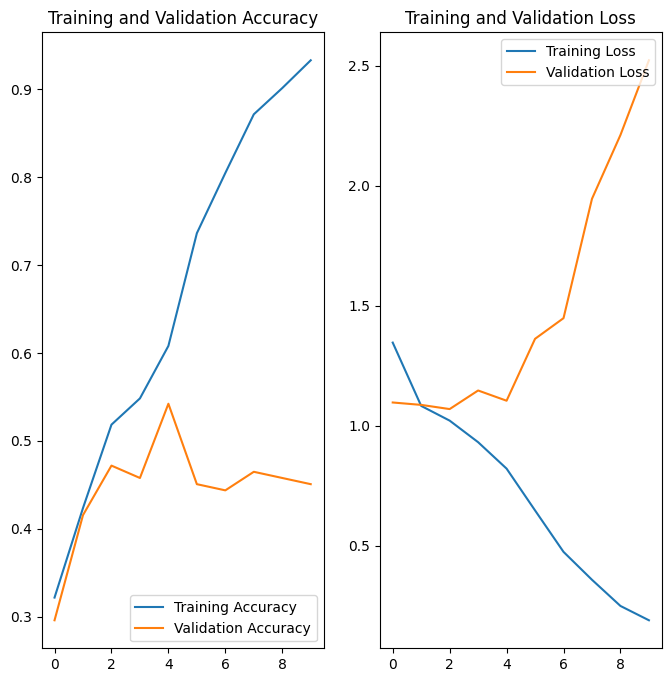

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [20]:
# data augmenetation

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [22]:
#visualize an example of data augmentation

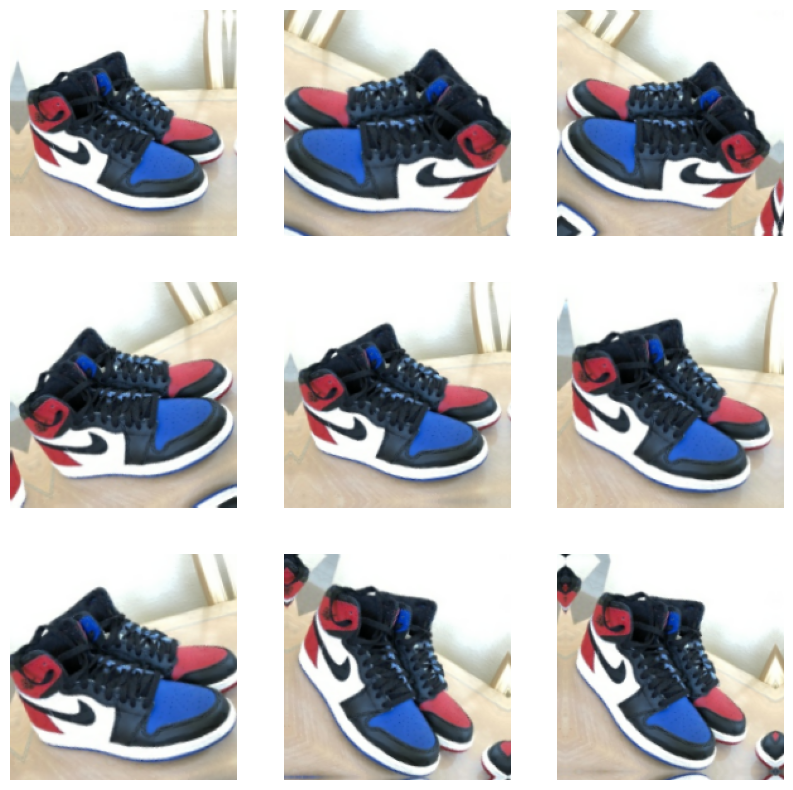

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [24]:
#create new Keras model

In [25]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs = 300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/300
18/18 [==============================] - 10s 391ms/step - loss: 1.4977 - accuracy: 0.3251 - val_loss: 1.1001 - val_accuracy: 0.3592
Epoch 2/300
18/18 [==============================] - 7s 386ms/step - loss: 1.0988 - accuracy: 0.3163 - val_loss: 1.0937 - val_accuracy: 0.4155
Epoch 3/300
18/18 [==============================] - 7s 384ms/step - loss: 1.0918 - accuracy: 0.4112 - val_loss: 1.0890 - val_accuracy: 0.3310
Epoch 4/300
18/18 [==============================] - 7s 381ms/step - loss: 1.0774 - accuracy: 0.3779 - val_loss: 1.0810 - val_accuracy: 0.4296
Epoch 5/300
18/18 [==============================] - 7s 385ms/step - loss: 1.0622 - accuracy: 0.4112 - val_loss: 1.1435 - val_accuracy: 0.4296
Epoch 6/300
18/18 [==============================] - 7s 382ms/step - loss: 1.0440 - accuracy: 0.4042 - val_loss: 1.0874 - val_accuracy: 0.4859
Epoch 7/300
18/18 [==============================] - 7s 387ms/step - loss: 1.0130 - accuracy: 0.4552 - val_loss: 1.0723 - val_accuracy: 0.500

18/18 [==============================] - 7s 379ms/step - loss: 0.3865 - accuracy: 0.8506 - val_loss: 2.7962 - val_accuracy: 0.5634
Epoch 42/300
18/18 [==============================] - 7s 379ms/step - loss: 0.4278 - accuracy: 0.8348 - val_loss: 2.4632 - val_accuracy: 0.5070
Epoch 43/300
18/18 [==============================] - 7s 384ms/step - loss: 0.4067 - accuracy: 0.8506 - val_loss: 2.1302 - val_accuracy: 0.5211
Epoch 44/300
18/18 [==============================] - 7s 381ms/step - loss: 0.3560 - accuracy: 0.8453 - val_loss: 2.2425 - val_accuracy: 0.5634
Epoch 45/300
18/18 [==============================] - 7s 381ms/step - loss: 0.3381 - accuracy: 0.8524 - val_loss: 2.3083 - val_accuracy: 0.5704
Epoch 46/300
18/18 [==============================] - 7s 381ms/step - loss: 0.2571 - accuracy: 0.9139 - val_loss: 2.5775 - val_accuracy: 0.5563
Epoch 47/300
18/18 [==============================] - 7s 383ms/step - loss: 0.2726 - accuracy: 0.8998 - val_loss: 2.4899 - val_accuracy: 0.5704
Epoch

Epoch 98/300
18/18 [==============================] - 7s 383ms/step - loss: 0.0888 - accuracy: 0.9701 - val_loss: 4.6655 - val_accuracy: 0.5493
Epoch 99/300
18/18 [==============================] - 7s 385ms/step - loss: 0.0996 - accuracy: 0.9719 - val_loss: 4.8057 - val_accuracy: 0.5986
Epoch 100/300
18/18 [==============================] - 7s 385ms/step - loss: 0.0842 - accuracy: 0.9772 - val_loss: 4.3851 - val_accuracy: 0.6268
Epoch 101/300
18/18 [==============================] - 7s 384ms/step - loss: 0.0793 - accuracy: 0.9789 - val_loss: 4.4894 - val_accuracy: 0.5986
Epoch 102/300
18/18 [==============================] - 7s 402ms/step - loss: 0.0781 - accuracy: 0.9736 - val_loss: 5.3063 - val_accuracy: 0.5845
Epoch 103/300
18/18 [==============================] - 7s 395ms/step - loss: 0.0798 - accuracy: 0.9736 - val_loss: 5.2879 - val_accuracy: 0.5704
Epoch 104/300
18/18 [==============================] - 7s 386ms/step - loss: 0.0616 - accuracy: 0.9789 - val_loss: 4.5686 - val_accu

18/18 [==============================] - 7s 384ms/step - loss: 0.0499 - accuracy: 0.9947 - val_loss: 5.5665 - val_accuracy: 0.5915
Epoch 155/300
18/18 [==============================] - 7s 386ms/step - loss: 0.0195 - accuracy: 0.9947 - val_loss: 4.9797 - val_accuracy: 0.6127
Epoch 156/300
18/18 [==============================] - 7s 387ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 5.4398 - val_accuracy: 0.6127
Epoch 157/300
18/18 [==============================] - 7s 384ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 4.9842 - val_accuracy: 0.5986
Epoch 158/300
18/18 [==============================] - 7s 386ms/step - loss: 0.0178 - accuracy: 0.9947 - val_loss: 5.8288 - val_accuracy: 0.5915
Epoch 159/300
18/18 [==============================] - 7s 384ms/step - loss: 0.0456 - accuracy: 0.9912 - val_loss: 5.8868 - val_accuracy: 0.5986
Epoch 160/300
18/18 [==============================] - 7s 386ms/step - loss: 0.0803 - accuracy: 0.9807 - val_loss: 4.6962 - val_accuracy: 0.6197

18/18 [==============================] - 7s 384ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 7.1141 - val_accuracy: 0.5986
Epoch 211/300
18/18 [==============================] - 7s 385ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 6.6868 - val_accuracy: 0.6268
Epoch 212/300
18/18 [==============================] - 7s 384ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 6.1585 - val_accuracy: 0.6408
Epoch 213/300
18/18 [==============================] - 7s 384ms/step - loss: 0.0148 - accuracy: 0.9965 - val_loss: 6.5123 - val_accuracy: 0.6197
Epoch 214/300
18/18 [==============================] - 7s 380ms/step - loss: 0.0845 - accuracy: 0.9859 - val_loss: 6.5965 - val_accuracy: 0.5986
Epoch 215/300
18/18 [==============================] - 7s 384ms/step - loss: 0.0639 - accuracy: 0.9754 - val_loss: 5.5318 - val_accuracy: 0.6056
Epoch 216/300
18/18 [==============================] - 7s 386ms/step - loss: 0.2188 - accuracy: 0.9420 - val_loss: 5.6883 - val_accuracy: 0.5915

18/18 [==============================] - 7s 399ms/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 6.3735 - val_accuracy: 0.5845
Epoch 267/300
18/18 [==============================] - 7s 385ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 6.5127 - val_accuracy: 0.6197
Epoch 268/300
18/18 [==============================] - 7s 387ms/step - loss: 0.0335 - accuracy: 0.9930 - val_loss: 7.3917 - val_accuracy: 0.6408
Epoch 269/300
18/18 [==============================] - 7s 387ms/step - loss: 0.0160 - accuracy: 0.9965 - val_loss: 6.5466 - val_accuracy: 0.6127
Epoch 270/300
18/18 [==============================] - 7s 387ms/step - loss: 0.0103 - accuracy: 0.9947 - val_loss: 6.7186 - val_accuracy: 0.5845
Epoch 271/300
18/18 [==============================] - 7s 388ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 7.2836 - val_accuracy: 0.5986
Epoch 272/300
18/18 [==============================] - 7s 386ms/step - loss: 0.0410 - accuracy: 0.9965 - val_loss: 6.9281 - val_accuracy: 0.6268

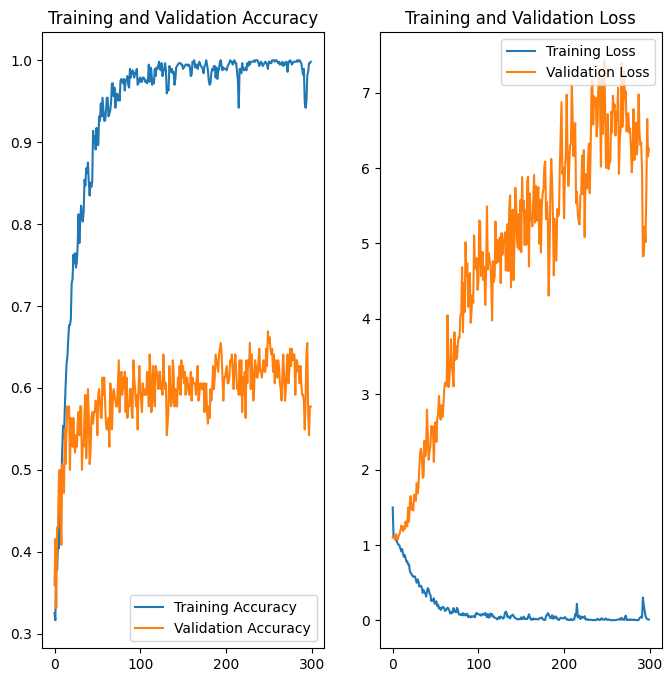

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
## Predict on new data

In [30]:
import numpy as np
path='image.jpg'
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 132ms/step
This image most likely belongs to converse with a 100.00 percent confidence.


In [31]:
#save our model
model.save('model.hdf5')
